# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

## ⚠️ AI-Generated Content Warning

**IMPORTANT**: This notebook was generated by an AI assistant and has not been fully verified. Use caution when interpreting code or results. The code should work as expected, but there may be inaccuracies or issues that would require human verification.

## Overview

This notebook explores [Dandiset 001174](https://dandiarchive.org/dandiset/001174/0.250331.2218), which contains calcium imaging data from Supplementary Motor Area (SMA) and Primary Motor Area (M1) of macaque monkeys. The dataset includes recordings obtained while the animals were at rest or engaged in an arm reaching task.

The research team used one-photon calcium imaging with miniature microscopes, implanted gradient index lenses, and expressed GCaMP6f to image calcium transients from projection neurons in the deep layers of SMA and M1. This technique allows the study of multiple genetically identified neurons with excellent spatial resolution.

In this notebook, we will:

1. Load the Dandiset using the DANDI API
2. Explore the NWB file structure
3. Visualize calcium imaging data 
4. Analyze cell activity and coactivation patterns
5. Explore spatial organization of the cells

## Required Packages

The following packages are required to run this notebook:

- `dandi`: For accessing the DANDI archive
- `pynwb`: For working with NWB files
- `h5py`: For working with HDF5 files (which NWB files are based on)
- `remfile`: For remote file access
- `numpy`: For numerical computations
- `matplotlib`: For visualization
- `pandas`: For data manipulation
- `seaborn`: For enhanced visualization

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import time

# Set seaborn theme for plotting
sns.set_theme()

## Accessing the Dandiset

We'll start by connecting to the DANDI archive and accessing the Dandiset metadata.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name', 'Name not available')}")
print(f"Dandiset description: {metadata.get('description', 'Description not available')[:300]}...")
print(f"Dandiset URL: {metadata.get('url', 'URL not available')}")
print(f"Contributors: {', '.join(metadata.get('contributor', ['Contributors not available']))}")
print(f"Keywords: {', '.join(metadata.get('keywords', ['Keywords not available']))}")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We ...
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218


TypeError: sequence item 0: expected str instance, dict found

## Exploring the Assets in the Dandiset

Let's list some of the assets (NWB files) in the Dandiset to get an understanding of the data structure.

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 10 assets:")
for asset in islice(assets, 10):
    print(f"- {asset.path} (Size: {asset.size / (1024**2):.1f} MB) (ID: {asset.identifier})")


First 10 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (Size: 10165.9 MB) (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (Size: 753.5 MB) (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (Size: 751.3 MB) (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (Size: 1617.4 MB) (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (Size: 1485.1 MB) (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)
- sub-Q/sub-Q_ses-20221201T132256_ophys.nwb (Size: 1580.2 MB) (ID: 628c87ee-c3e1-44f3-b4b4-54aa67a0f6e4)
- sub-Q/sub-Q_ses-20221202T122907_ophys.nwb (Size: 1496.2 MB) (ID: 35368f54-9bc6-4424-af61-99aa98201bdf)
- sub-Q/sub-Q_ses-20221206T121002_ophys.nwb (Size: 23953.5 MB) (ID: 964e4858-3c8b-4bfd-88dc-5dfd0b201c20)
- sub-Q/sub-Q_ses-20220915T133954_ophys.nwb (Size: 1123.7 MB) (ID: 807851a7-ad52-4505-84ee-3b155a5bd2a3)
- sub-Q/sub-Q_ses-20221201T134628_ophys.nwb (Size: 796.7 

## Loading and Exploring an NWB File

For this demonstration, we'll focus on a single NWB file from subject Q's session on December 1, 2022. This file contains calcium imaging data recorded during the spontaneous condition (the animal at rest).

We'll access this file remotely using the DANDI API.

In [4]:
# Define the URL for the NWB file we want to load
asset_id = "628c87ee-c3e1-44f3-b4b4-54aa67a0f6e4"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Load the NWB file
print(f"Loading NWB file from: {url}")
print("This might take a moment as we're streaming the file from the DANDI archive...")
start_time = time.time()

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"File loaded in {time.time() - start_time:.2f} seconds")

Loading NWB file from: https://api.dandiarchive.org/api/assets/628c87ee-c3e1-44f3-b4b4-54aa67a0f6e4/download/
This might take a moment as we're streaming the file from the DANDI archive...


File loaded in 1.71 seconds


## NWB File Metadata

Let's explore the basic metadata of this NWB file.

In [5]:
# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File identifier: {nwb.identifier}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")

# Let's see what data interfaces are available in this file
print("\nProcessing modules:")
for module_name, module in nwb.processing.items():
    print(f"\n  Module: {module_name}")
    print(f"  Description: {module.description}")
    print("  Data interfaces:")
    for interface_name in module.data_interfaces.keys():
        print(f"    - {interface_name}")

Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2022-12-01 13:22:56.597000+00:00
File identifier: 73e4c036-2ebb-48e2-afb0-fc70ff6ef2c9
Subject ID: Q
Subject species: Macaca mulatta
Subject sex: F
Subject age: P5Y

Processing modules:

  Module: ophys
  Description: Optical physiology data obtained by processing raw calcium imaging data
  Data interfaces:
    - EventAmplitude
    - Fluorescence
    - ImageSegmentation


## Structure of the NWB File

The NWB file contains several key components:

1. **OnePhotonSeries**: Raw calcium imaging data of dimensions (12819, 320, 200) - representing 12,819 frames with a resolution of 320x200 pixels

2. **Processing Module (ophys)**: Contains processed optical physiology data:
   - **ImageSegmentation**: Identifies regions of interest (ROIs) corresponding to cells
   - **Fluorescence**: Raw fluorescence traces for each ROI
   - **EventAmplitude**: Detected calcium events in the fluorescence traces

3. **Metadata about the imaging setup**:
   - Imaging device: Inscopix NVista3 miniature microscope
   - Imaging rate: 10 Hz
   - Excitation wavelength: 475 nm

Let's explore the raw imaging data and ROIs in more detail.

In [6]:
# Get information about the raw imaging data
one_photon_series = nwb.acquisition["OnePhotonSeries"]
print(f"Raw imaging data shape: {one_photon_series.data.shape}")
print(f"Imaging rate: {one_photon_series.rate} Hz")
print(f"Imaging description: {one_photon_series.description}")
print(f"Unit: {one_photon_series.unit}")

# Get information about the ROIs
ophys = nwb.processing["ophys"]
image_segmentation = ophys.data_interfaces["ImageSegmentation"]
plane_segmentation = image_segmentation.plane_segmentations["PlaneSegmentation"]
roi_count = len(plane_segmentation.id.data[:])
print(f"\nNumber of ROIs (cells): {roi_count}")

# Get the fluorescence data
fluorescence = ophys.data_interfaces["Fluorescence"]
roi_response_series = fluorescence.roi_response_series["RoiResponseSeries"]
print(f"Fluorescence data shape: {roi_response_series.data.shape}")

# Get the event amplitude data
event_amplitude = ophys.data_interfaces["EventAmplitude"]
print(f"Event amplitude data shape: {event_amplitude.data.shape}")

Raw imaging data shape: (12819, 320, 200)
Imaging rate: 10.0 Hz
Imaging description: Miniscope imaging data
Unit: fluorescence

Number of ROIs (cells): 13
Fluorescence data shape: (12819, 13)
Event amplitude data shape: (12819, 13)


## Visualizing the Raw Imaging Data

Let's visualize a sample frame from the raw imaging data to get a sense of what the calcium imaging looks like. We'll also create a time-averaged image to see the overall structure.

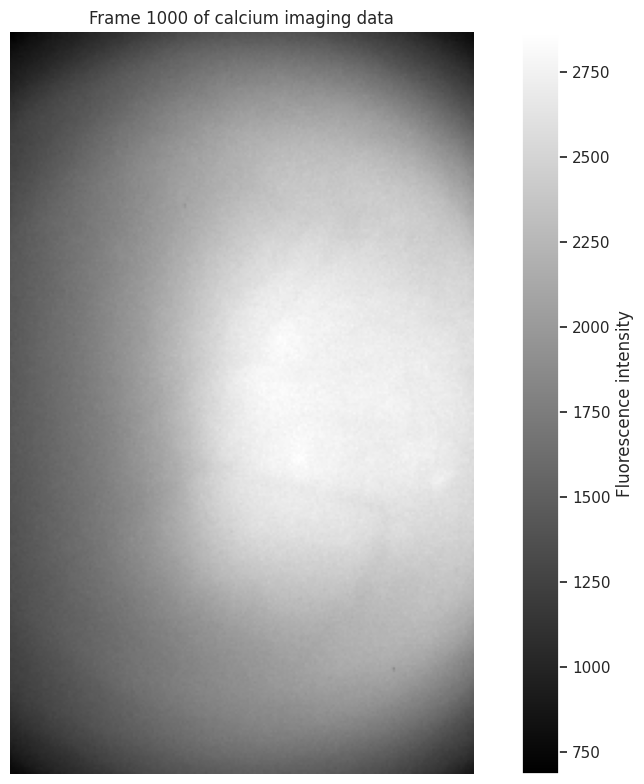

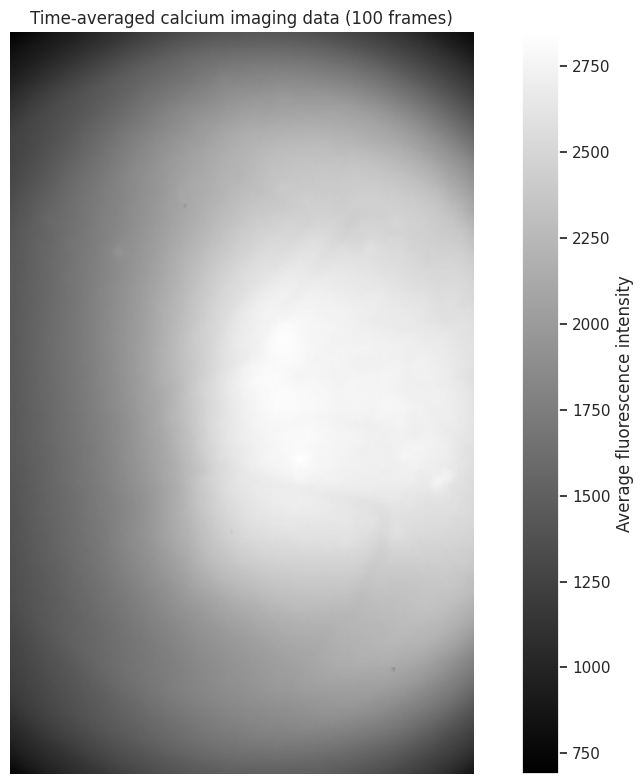

In [7]:
# Plot a sample frame from the raw imaging data
plt.figure(figsize=(10, 8))

# Get a single frame (the 1000th frame)
frame_idx = 1000
frame = one_photon_series.data[frame_idx, :, :]

plt.imshow(frame, cmap='gray')
plt.colorbar(label='Fluorescence intensity')
plt.title(f'Frame {frame_idx} of calcium imaging data')
plt.axis('off')
plt.tight_layout()
plt.show()

# Create a time-averaged image from 100 frames to improve signal-to-noise ratio
plt.figure(figsize=(10, 8))

# Sample 100 frames evenly throughout the recording
sample_indices = np.linspace(0, one_photon_series.data.shape[0] - 1, 100, dtype=int)
avg_frame = np.mean([one_photon_series.data[i, :, :] for i in sample_indices], axis=0)

plt.imshow(avg_frame, cmap='gray')
plt.colorbar(label='Average fluorescence intensity')
plt.title('Time-averaged calcium imaging data (100 frames)')
plt.axis('off')
plt.tight_layout()
plt.show()

## Visualizing the Identified Cells (ROIs)

Now let's visualize the cells that were identified in the calcium imaging data. Each cell is represented by an "image mask" which shows its spatial footprint.

In [8]:
# Get the ROI image masks
image_masks = plane_segmentation.image_mask.data[:]

# Create a figure to visualize all ROIs
plt.figure(figsize=(12, 10))

# Create a composite image of all ROIs with different colors
composite_mask = np.zeros((320, 200, 3))
all_masks = np.zeros((320, 200))

# Assign random colors to each ROI
np.random.seed(0)  # For reproducibility
colors = np.random.rand(roi_count, 3)

for i in range(roi_count):
    # Each image mask is stored as a 1D array and needs to be reshaped
    mask = image_masks[i].reshape(320, 200)
    all_masks += mask
    
    # Add this ROI to the composite image with a unique color
    for c in range(3):
        composite_mask[:, :, c] += mask * colors[i, c]

# Normalize the composite mask for visualization
composite_mask /= np.max(composite_mask) if np.max(composite_mask) > 0 else 1

# Plot the composite ROI mask
plt.imshow(composite_mask)
plt.title(f'Spatial distribution of all {roi_count} cells (ROIs)')
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot a heatmap of all ROIs overlaid
plt.figure(figsize=(12, 10))
plt.imshow(all_masks, cmap='hot')
plt.colorbar(label='ROI density')
plt.title('Heatmap of all ROIs')
plt.axis('off')
plt.tight_layout()
plt.show()

ValueError: cannot reshape array of size 47200 into shape (320,200)

<Figure size 1200x1000 with 0 Axes>

## Exploring Fluorescence Traces

Now let's look at the fluorescence traces for each cell. These traces show the fluorescence intensity over time, which corresponds to the calcium concentration within each cell - a proxy for neural activity.

<Figure size 1500x1000 with 0 Axes>

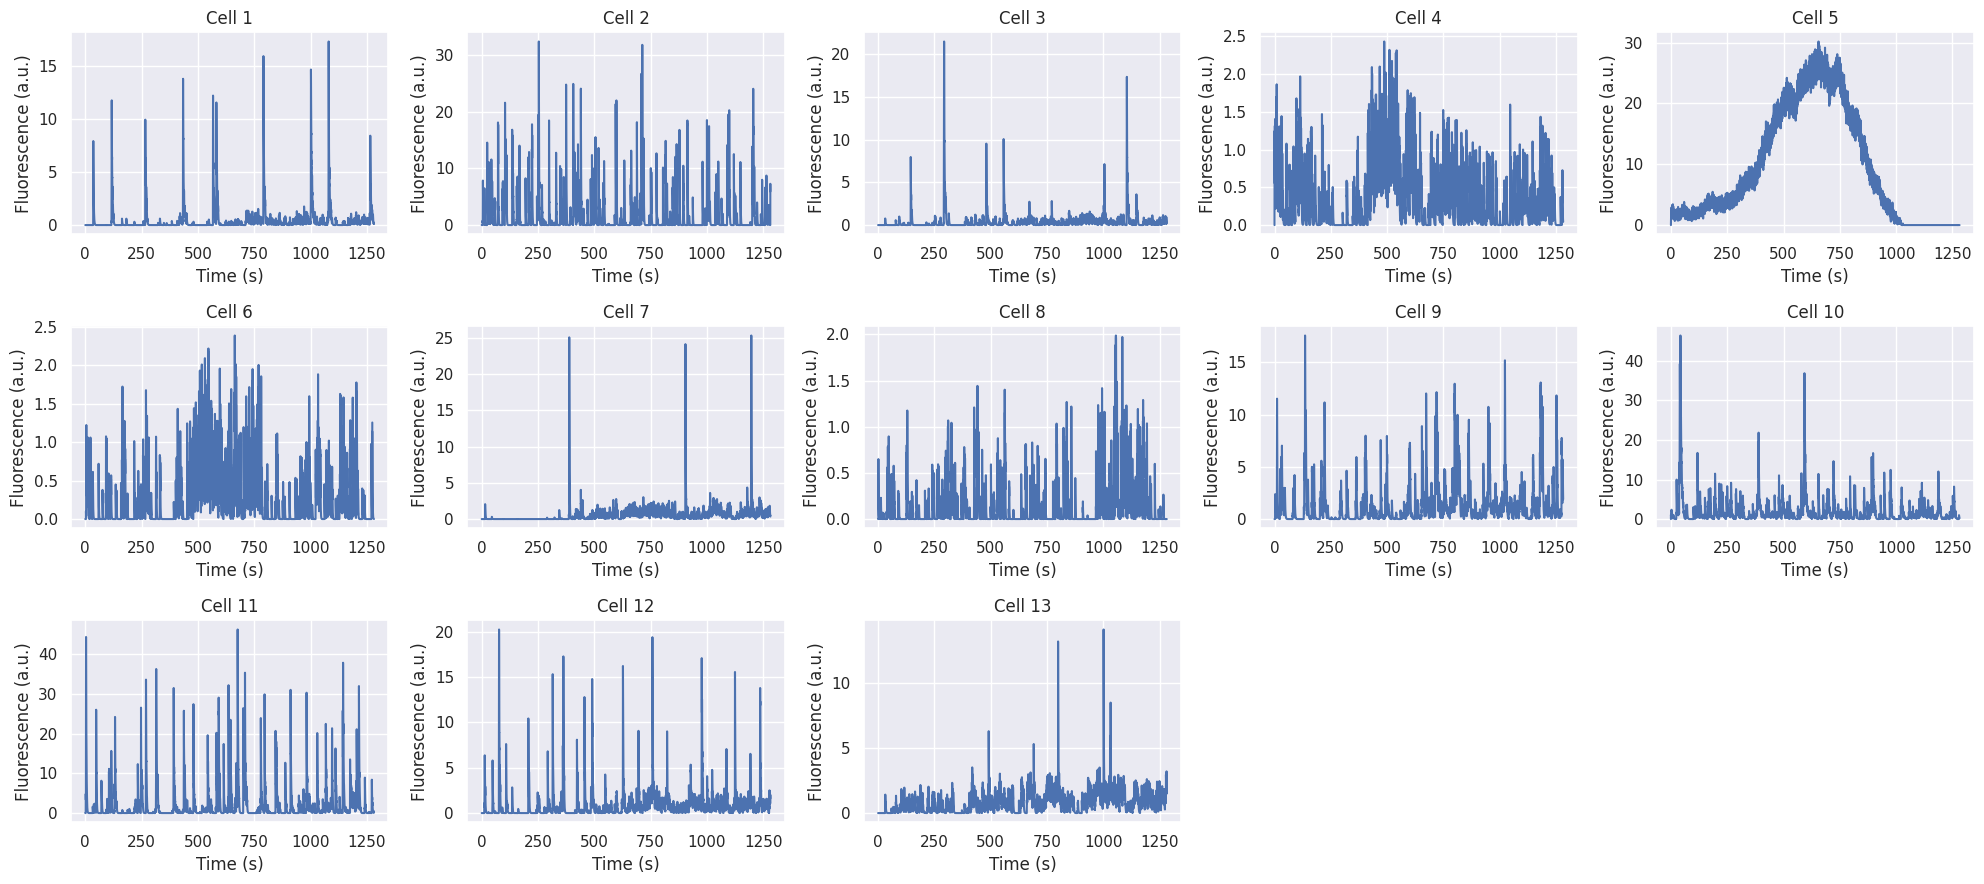

In [9]:
# Get the fluorescence data
fluorescence_data = roi_response_series.data[:]

# Create time points (in seconds)
time_points = np.arange(fluorescence_data.shape[0]) / roi_response_series.rate

# Plot fluorescence traces for all cells
plt.figure(figsize=(15, 10))

# Create a grid of subplots, 5 cells per row
n_rows = (roi_count + 4) // 5  # Ceiling division
fig, axes = plt.subplots(n_rows, 5, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i in range(roi_count):
    ax = axes[i]
    ax.plot(time_points, fluorescence_data[:, i])
    ax.set_title(f'Cell {i+1}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Fluorescence (a.u.)')

# Hide any unused subplots
for i in range(roi_count, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Calcium Event Detection

The NWB file also contains "EventAmplitude" data, which represents detected calcium transient events from the fluorescence traces. These events correspond to neuronal spiking or bursting activity. Let's visualize these events along with the raw fluorescence traces for a few example cells.

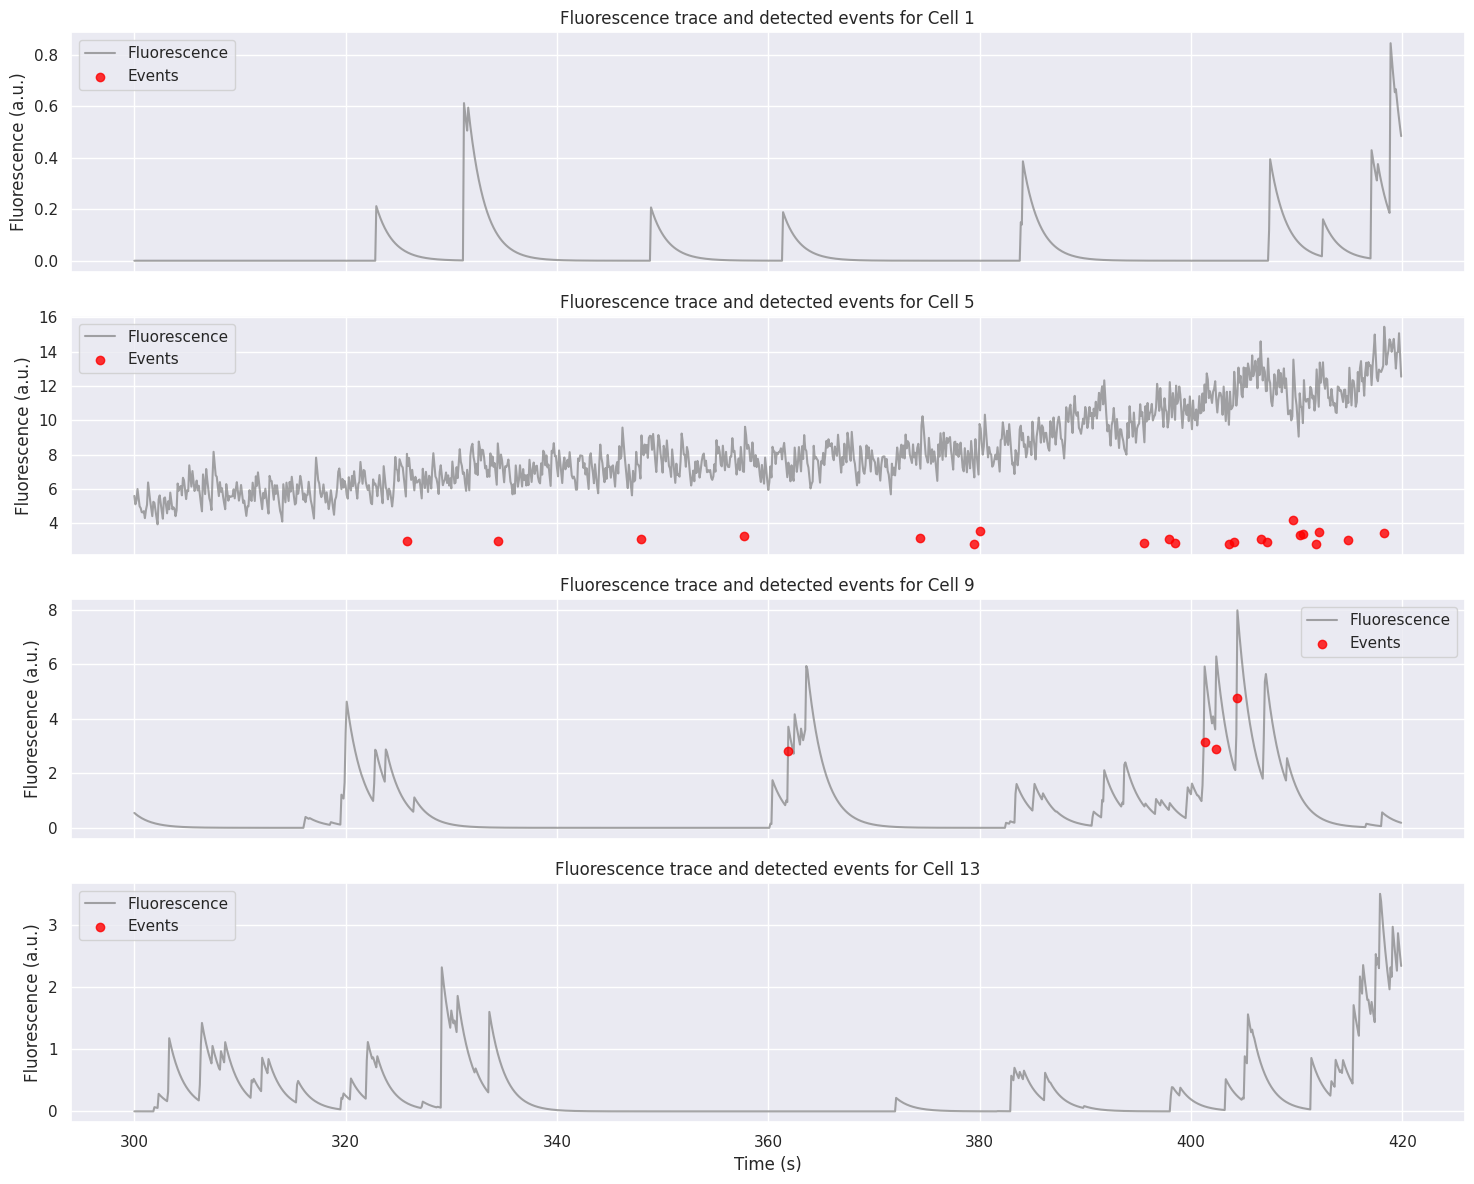

In [10]:
# Get the event amplitude data
event_amplitude_data = event_amplitude.data[:]

# Plot fluorescence traces and event amplitudes for 4 example cells
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Choose 4 random cells to visualize
example_cells = [0, 4, 8, 12]  # Choose 4 cells spread across the ROIs
cell_labels = [f"Cell {i+1}" for i in example_cells]

# Plot 2 minutes of data (1200 frames at 10 Hz)
start_time = 300  # seconds
end_time = 420  # seconds
start_frame = int(start_time * roi_response_series.rate)
end_frame = int(end_time * roi_response_series.rate)
plot_time = time_points[start_frame:end_frame]

for i, (cell_idx, ax) in enumerate(zip(example_cells, axes)):
    # Plot the fluorescence trace
    ax.plot(plot_time, fluorescence_data[start_frame:end_frame, cell_idx], 
            label='Fluorescence', color='gray', alpha=0.7)
    
    # Plot the event amplitudes
    # Only plot non-zero event amplitudes
    event_times = []
    event_amps = []
    for t, e in zip(plot_time, event_amplitude_data[start_frame:end_frame, cell_idx]):
        if e > 0:
            event_times.append(t)
            event_amps.append(e)
    
    ax.scatter(event_times, event_amps, color='red', alpha=0.8, label='Events', zorder=3)
    
    ax.set_ylabel('Fluorescence (a.u.)')
    ax.set_title(f'Fluorescence trace and detected events for {cell_labels[i]}')
    ax.legend()

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

## Analyzing Calcium Event Patterns

Let's analyze the patterns of calcium events across all cells to look for correlated activity, which could suggest functional connectivity between neurons.

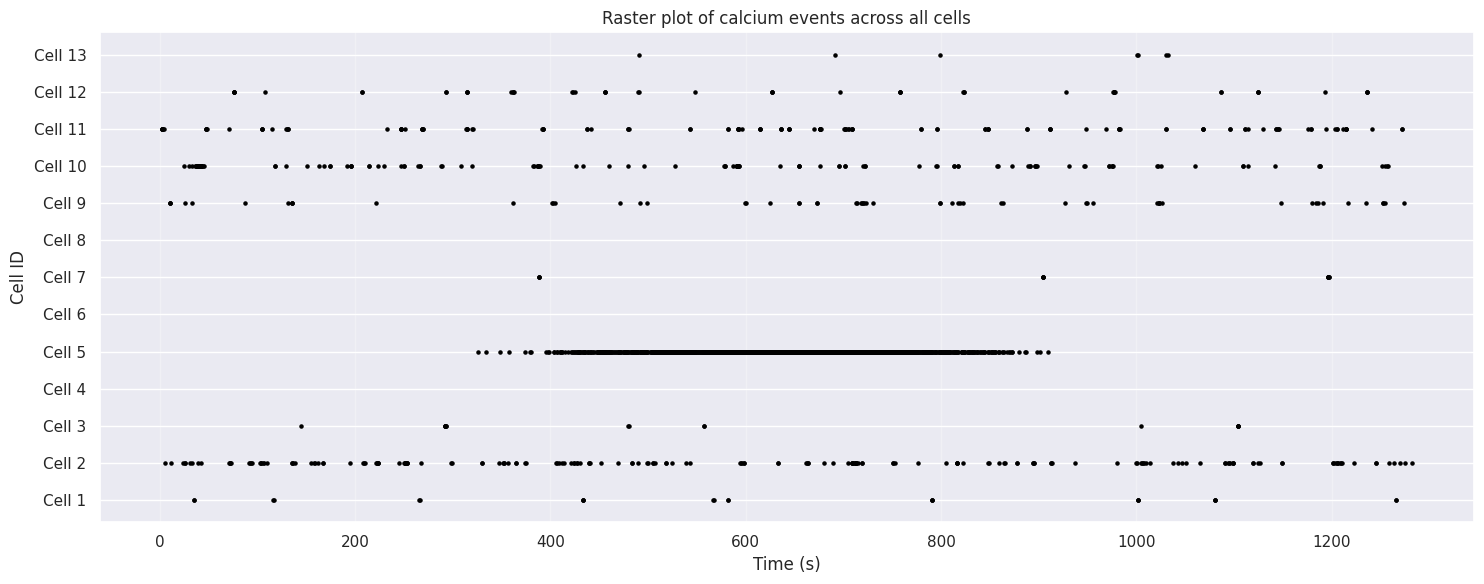

In [11]:
# Create a raster plot of calcium events
plt.figure(figsize=(15, 6))

# We'll consider an event as any event amplitude above a certain threshold
threshold = 0  # Any non-zero value is considered an event

# Create a binary event matrix (1 = event, 0 = no event)
events_binary = event_amplitude_data > threshold

# Plot the raster
cell_ids = np.arange(roi_count)
event_times_list = []

for cell_idx in range(roi_count):
    # Find the times of events for this cell
    event_times = np.where(events_binary[:, cell_idx])[0] / roi_response_series.rate
    event_times_list.append(event_times)
    plt.scatter(event_times, np.ones_like(event_times) * cell_idx, s=5, c='black')

plt.yticks(np.arange(roi_count), [f'Cell {i+1}' for i in range(roi_count)])
plt.xlabel('Time (s)')
plt.ylabel('Cell ID')
plt.title('Raster plot of calcium events across all cells')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Cell Activity Correlation Analysis

Let's analyze how the activity of different cells is correlated. This can give us insight into functional relationships between neurons.

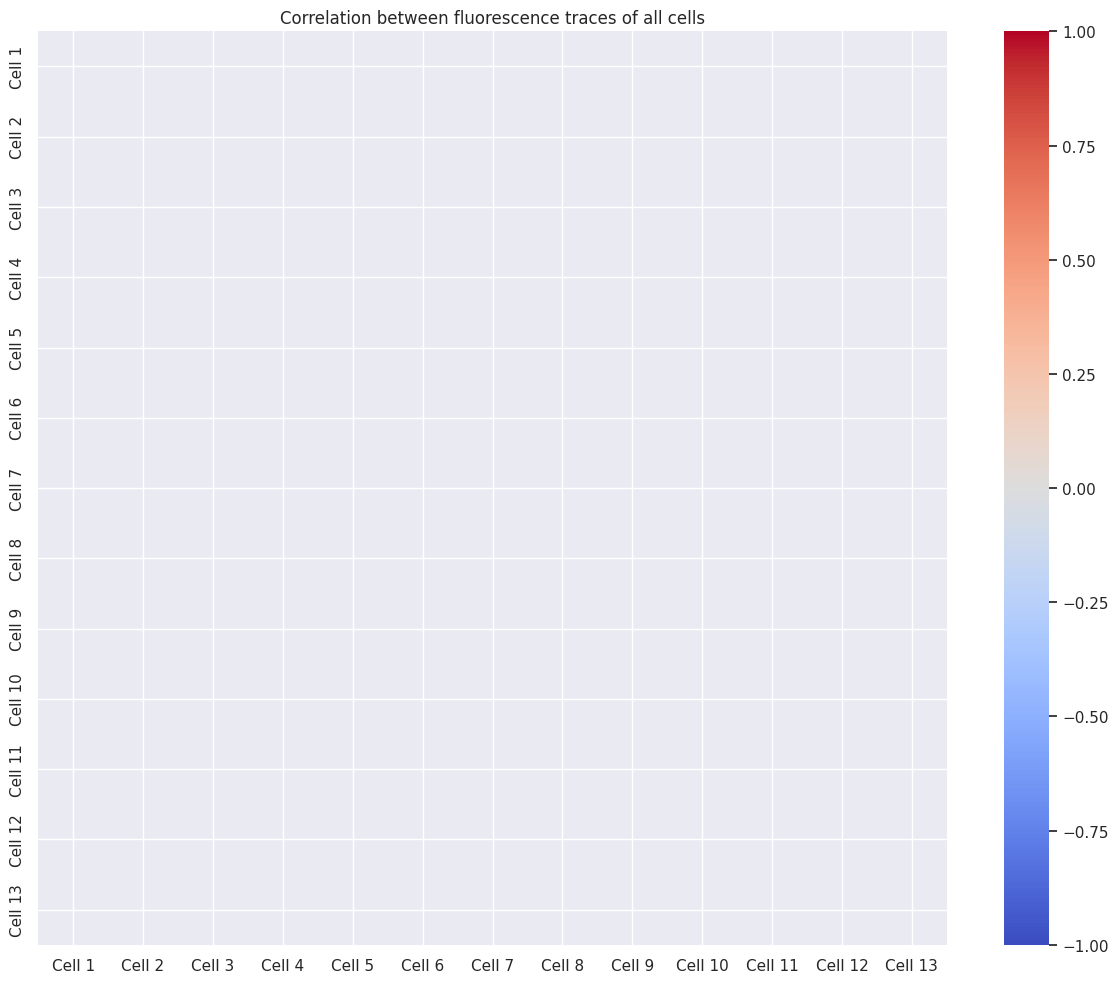

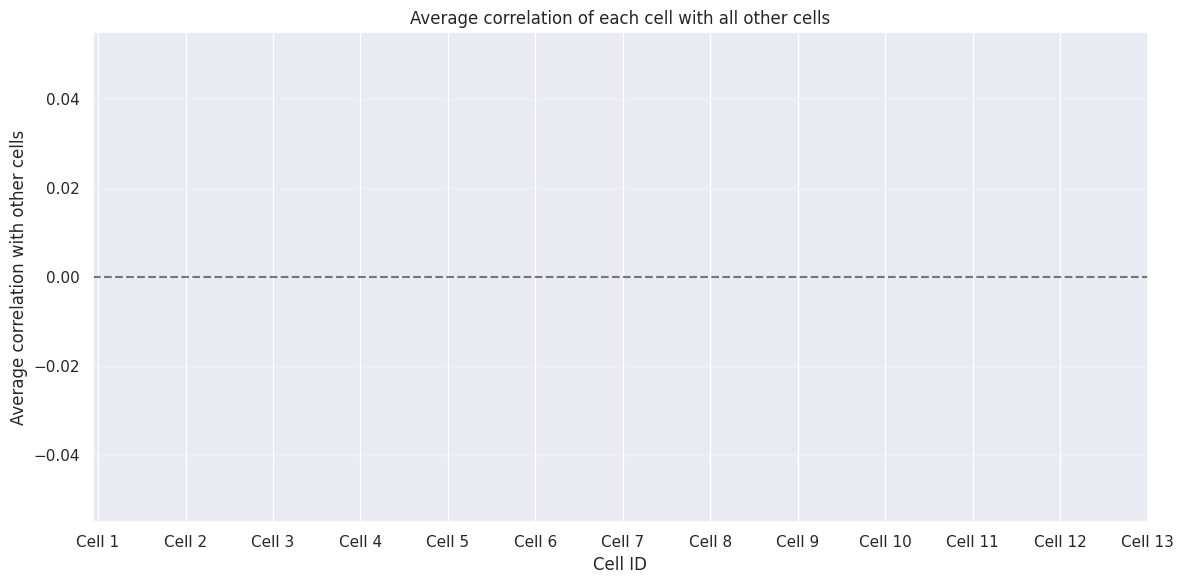

In [12]:
# Calculate correlation between fluorescence traces of all cells
corr_matrix = np.corrcoef(fluorescence_data.T)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, 
            xticklabels=[f'Cell {i+1}' for i in range(roi_count)],
            yticklabels=[f'Cell {i+1}' for i in range(roi_count)])
plt.title('Correlation between fluorescence traces of all cells')
plt.tight_layout()
plt.show()

# Calculate the average correlation for each cell with all other cells
avg_correlation = np.zeros(roi_count)
for i in range(roi_count):
    # Exclude self-correlation (which is always 1)
    other_cells = list(range(roi_count))
    other_cells.remove(i)
    avg_correlation[i] = np.mean(corr_matrix[i, other_cells])

# Plot the average correlation
plt.figure(figsize=(12, 6))
plt.bar(np.arange(roi_count), avg_correlation)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Cell ID')
plt.ylabel('Average correlation with other cells')
plt.xticks(np.arange(roi_count), [f'Cell {i+1}' for i in range(roi_count)])
plt.title('Average correlation of each cell with all other cells')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Temporal Analysis of Cell Activity

Now let's look at how cell activity changes over time by breaking the recording into segments and analyzing activity in each segment.

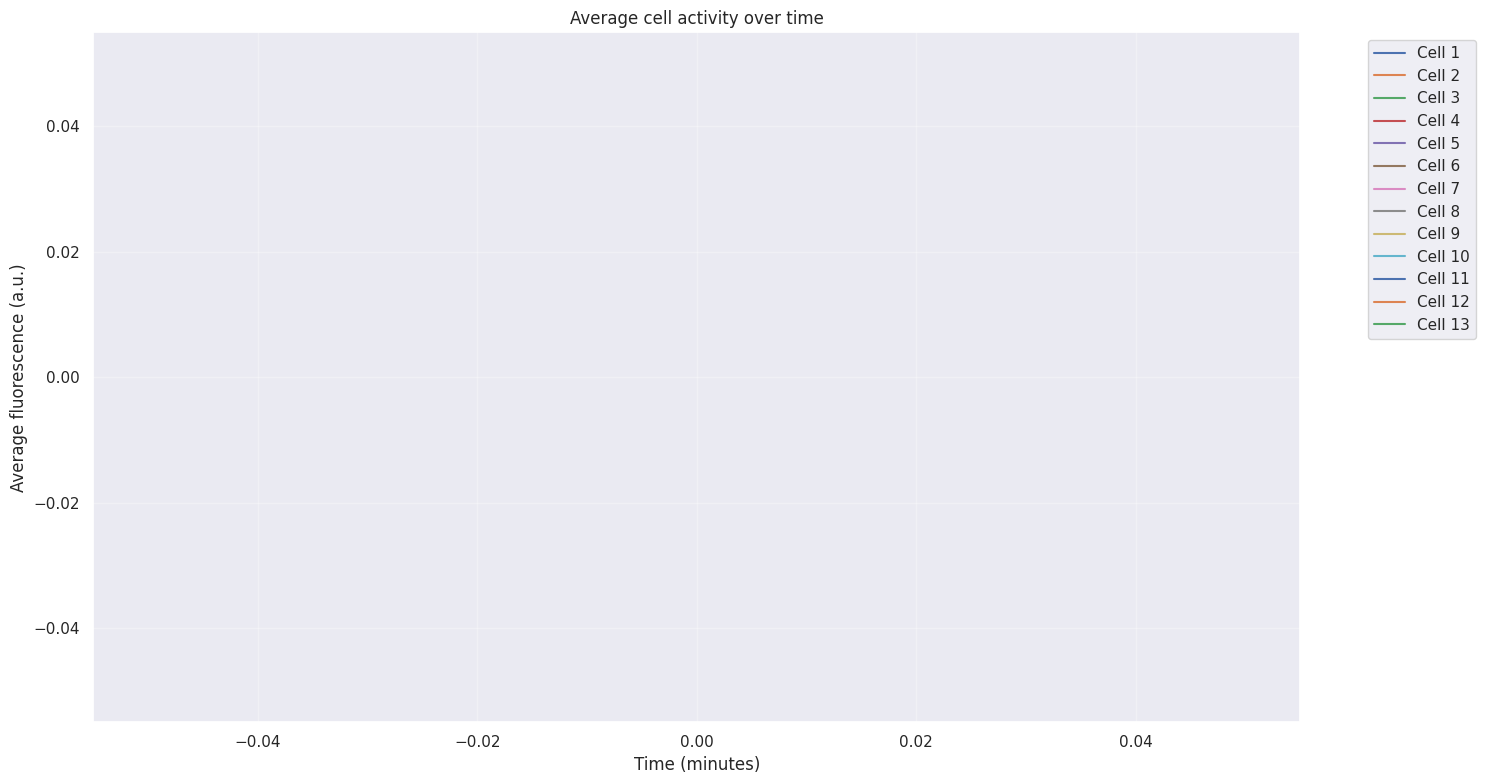

In [13]:
# Segment the recording into 5-minute chunks and calculate activity in each chunk
segment_length = 5 * 60  # 5 minutes in seconds
frames_per_segment = int(segment_length * roi_response_series.rate)
total_frames = fluorescence_data.shape[0]
n_segments = total_frames // frames_per_segment

# Calculate average activity per cell per segment
segment_activity = np.zeros((n_segments, roi_count))

for s in range(n_segments):
    start_frame = s * frames_per_segment
    end_frame = start_frame + frames_per_segment
    
    # Calculate mean activity for each cell in this segment
    segment_activity[s, :] = np.mean(fluorescence_data[start_frame:end_frame, :], axis=0)

# Plot the activity over segments
plt.figure(figsize=(15, 8))
for i in range(roi_count):
    plt.plot(np.arange(n_segments) * segment_length / 60, segment_activity[:, i], 
             label=f'Cell {i+1}')

plt.xlabel('Time (minutes)')
plt.ylabel('Average fluorescence (a.u.)')
plt.title('Average cell activity over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Visualizing Cell Activations on the Imaging Plane

Let's create a visualization that shows the spatial organization of cells along with their activity.

In [14]:
# Create a visualization of the ROIs colored by their average activity
plt.figure(figsize=(12, 10))

# Calculate the average fluorescence for each cell
avg_fluorescence = np.mean(fluorescence_data, axis=0)

# Normalize between 0 and 1 for visualization
norm_avg_fluorescence = (avg_fluorescence - np.min(avg_fluorescence)) / (np.max(avg_fluorescence) - np.min(avg_fluorescence))

# Create an RGB image where intensity corresponds to activity
activity_mask = np.zeros((320, 200))

for i in range(roi_count):
    # Reshape the mask and add it to the activity mask, weighted by its activity
    mask = image_masks[i].reshape(320, 200)
    activity_mask += mask * norm_avg_fluorescence[i]

# Plot the average frame with the activity mask overlaid
plt.imshow(avg_frame, cmap='gray', alpha=0.7)
plt.imshow(activity_mask, cmap='hot', alpha=0.6)
plt.colorbar(label='Normalized average activity')
plt.title('Spatial organization of cells colored by average activity')
plt.axis('off')
plt.tight_layout()
plt.show()

ValueError: cannot reshape array of size 47200 into shape (320,200)

<Figure size 1200x1000 with 0 Axes>

## Exploring a Neurosift Link

The Neurosift app allows for online visualization of NWB files. Here's a link to view this NWB file in the Neurosift app:

[View this NWB file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/628c87ee-c3e1-44f3-b4b4-54aa67a0f6e4/download/&dandisetId=001174&dandisetVersion=0.250331.2218)

## Summary and Future Directions

In this notebook, we've explored calcium imaging data from a macaque's Supplementary Motor Area (SMA) during a resting state. We've:

1. Loaded the NWB file containing one-photon calcium imaging data
2. Visualized the raw imaging data and identified cells (ROIs)
3. Examined fluorescence traces representing calcium activity in individual cells
4. Analyzed calcium events detected in these traces
5. Explored correlations between cell activities
6. Visualized spatial organization of cells and their activity

### Future Directions

This dataset opens up many possibilities for further analysis:

1. **Task-Related Activity**: Compare the spontaneous activity patterns observed here with activity during the reaching task to identify task-related modulations of neuronal activity.

2. **Network Analysis**: Perform more detailed network analysis to identify functional cell assemblies or clusters of cells that show coordinated activity.

3. **Temporal Dynamics**: Investigate temporal dynamics such as oscillations or sequential activation patterns in the calcium signals.

4. **Cross-Area Comparison**: Compare activity patterns between SMA and M1 to understand how these areas interact during motor planning and execution.

5. **Across-Subject Comparison**: Extend the analysis to multiple subjects to identify common motifs or individual differences in neural activity patterns.

This Dandiset provides a valuable resource for studying motor cortex activity in non-human primates, which has important implications for understanding human motor control in both healthy and pathological conditions.